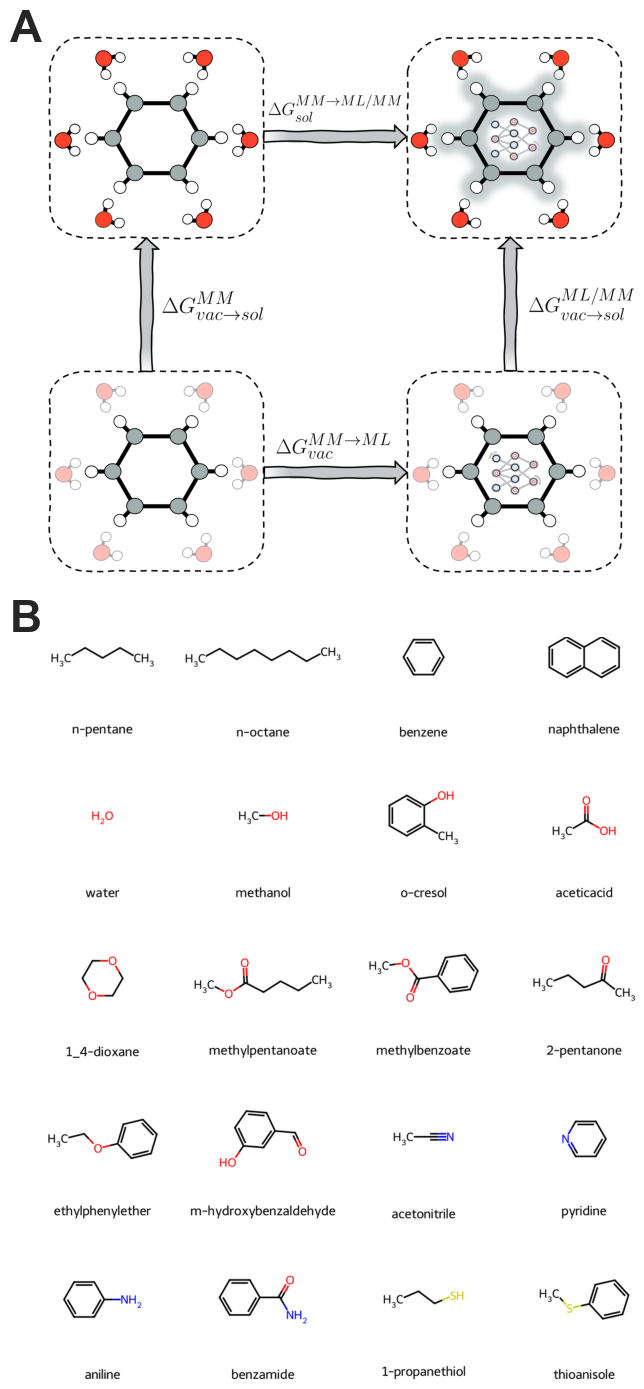

In [ ]:
import io

import cairosvg
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image, ImageOps

sns.set(style="whitegrid", palette="colorblind", context="paper", font_scale=1.5)


def trim_white_borders_tight(img, tol=10):
    """
    Crop white borders tightly from an image.
    """
    gray = img.convert("L")
    inverted = ImageOps.invert(gray)
    bbox = inverted.getbbox()
    if bbox:
        return img.crop(bbox)
    else:
        return img


svg_path = "/Users/admin/repos/EMLE_HFE_SI/figures/dataset/molecules_grid.svg"
png_data = cairosvg.svg2png(url=svg_path, dpi=1200)
imgB = Image.open(io.BytesIO(png_data))
imgA = Image.open("thermodynamic_cycle.png")
imgB_tight = trim_white_borders_tight(imgB, tol=5)
scale_factor = 0.8
new_width = int(imgA.width * scale_factor)

imgA_rescaled = imgA.resize(
    (new_width, int(new_width * imgA.height / imgA.width)),
    resample=Image.Resampling.LANCZOS,
)
imgB_resized = imgB_tight.resize(
    (new_width, int(new_width * imgB_tight.height / imgB_tight.width)),
    resample=Image.Resampling.LANCZOS,
)

hA = imgA_rescaled.height
hB = imgB_resized.height
height_ratios = [hA, hB]
fig, (ax1, ax2) = plt.subplots(
    2,
    1,
    figsize=(8, 8 * (hA + hB) / new_width),
    gridspec_kw={"height_ratios": height_ratios},
)

ax1.imshow(imgA_rescaled)
ax2.imshow(imgB_resized)

ax1.axis("off")
ax2.axis("off")

ax1.text(
    -0.01,
    1.05,
    "A",
    transform=ax1.transAxes,
    fontsize=32,
    fontweight="bold",
    va="top",
    ha="right",
)
ax2.text(
    -0.01,
    1.05,
    "B",
    transform=ax2.transAxes,
    fontsize=32,
    fontweight="bold",
    va="top",
    ha="right",
)

plt.subplots_adjust(hspace=0.1)
plt.savefig(
    "fig1_thermodynamic_cicle_and_dataset.pdf",
    bbox_inches="tight",
    dpi=300,
    transparent=False,
)
plt.show()